In [1]:
pip install -U kaleido

Note: you may need to restart the kernel to use updated packages.


Supply Chain of a Fashion and Beauty Startup

---------Importing Libraries and Reading csv file------------

In [2]:
import pandas as pd
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
pio.renderers.default = "svg"
pio.templates.default = "plotly_white" 

df = pd.read_csv("supply_chain_data.csv") 
print(df.head())

  Product type   SKU      Price  Availability  Number of products sold  \
0     haircare  SKU0  69.808006            55                      802   
1     skincare  SKU1  14.843523            95                      736   
2     haircare  SKU2  11.319683            34                        8   
3     skincare  SKU3  61.163343            68                       83   
4     skincare  SKU4   4.805496            26                      871   

   Revenue generated Customer demographics  Stock levels  Lead times  \
0        8661.996792            Non-binary            58           7   
1        7460.900065                Female            53          30   
2        9577.749626               Unknown             1          10   
3        7766.836426            Non-binary            23          13   
4        2686.505152            Non-binary             5           3   

   Order quantities  ...  Location Lead time  Production volumes  \
0                96  ...    Mumbai        29          

In [3]:
print(df.columns)

Index(['Product type', 'SKU', 'Price', 'Availability',
       'Number of products sold', 'Revenue generated', 'Customer demographics',
       'Stock levels', 'Lead times', 'Order quantities', 'Shipping times',
       'Shipping carriers', 'Shipping costs', 'Supplier name', 'Location',
       'Lead time', 'Production volumes', 'Manufacturing lead time',
       'Manufacturing costs', 'Inspection results', 'Defect rates',
       'Transportation modes', 'Routes', 'Costs'],
      dtype='object')


---Information about this dataset to identify null values and datatype---

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product type             100 non-null    object 
 1   SKU                      100 non-null    object 
 2   Price                    100 non-null    float64
 3   Availability             100 non-null    int64  
 4   Number of products sold  100 non-null    int64  
 5   Revenue generated        100 non-null    float64
 6   Customer demographics    100 non-null    object 
 7   Stock levels             100 non-null    int64  
 8   Lead times               100 non-null    int64  
 9   Order quantities         100 non-null    int64  
 10  Shipping times           100 non-null    int64  
 11  Shipping carriers        100 non-null    object 
 12  Shipping costs           100 non-null    float64
 13  Supplier name            100 non-null    object 
 14  Location                 10

There is no null values in the data.

In [5]:
print(df.describe())

            Price  Availability  Number of products sold  Revenue generated  \
count  100.000000    100.000000               100.000000         100.000000   
mean    49.462461     48.400000               460.990000        5776.048187   
std     31.168193     30.743317               303.780074        2732.841744   
min      1.699976      1.000000                 8.000000        1061.618523   
25%     19.597823     22.750000               184.250000        2812.847151   
50%     51.239831     43.500000               392.500000        6006.352023   
75%     77.198228     75.000000               704.250000        8253.976921   
max     99.171329    100.000000               996.000000        9866.465458   

       Stock levels  Lead times  Order quantities  Shipping times  \
count    100.000000  100.000000        100.000000      100.000000   
mean      47.770000   15.960000         49.220000        5.750000   
std       31.369372    8.785801         26.784429        2.724283   
min        0

-----Revenue and Sales Analysis-----

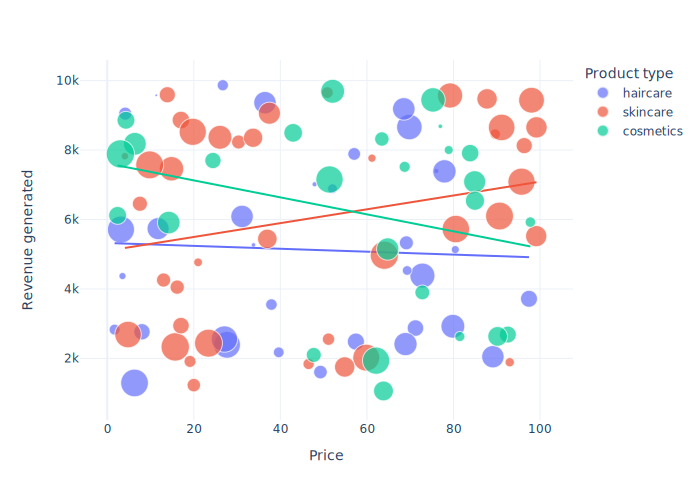

In [6]:
fig = px.scatter(df, x ='Price', y='Revenue generated', color="Product type",size="Number of products sold",trendline="ols")
fig.show("svg")

It shows that the skincare products more revenue than the other products.The higher the price of the skincare products,the more revenue it generates.

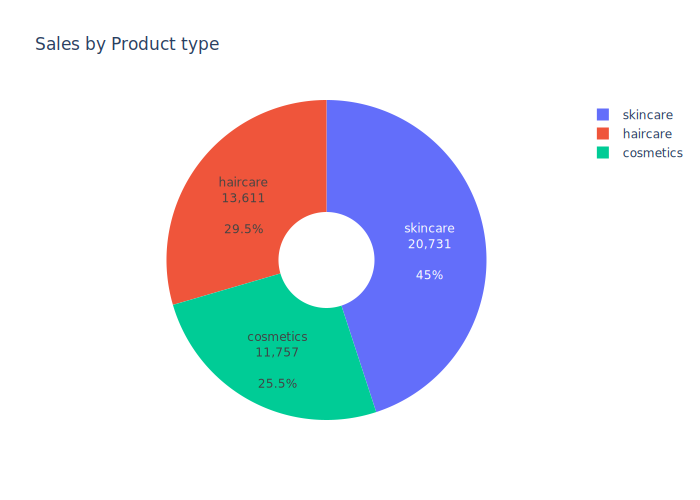

In [7]:
sales_data = df.groupby('Product type')['Number of products sold'].sum().reset_index()
fig = px.pie(sales_data, values='Number of products sold', names='Product type', title='Sales by Product type',hole=0.3)
fig.update_traces(textposition='inside', textinfo='value+label+percent')
fig.show("svg")

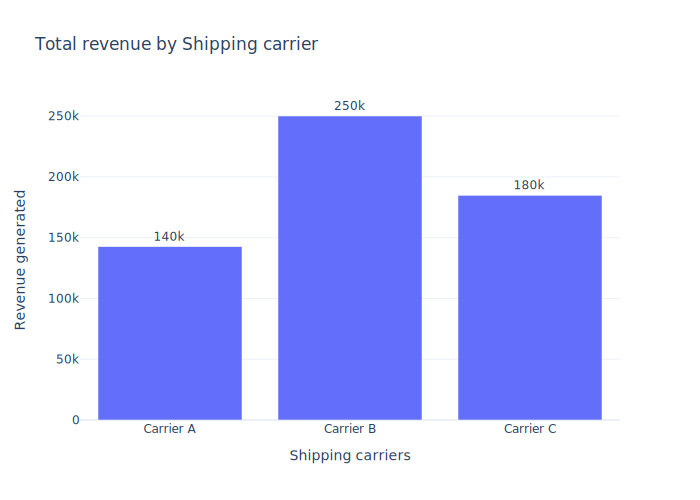

In [8]:
ship_revenue_data= df.groupby("Shipping carriers")["Revenue generated"].sum().reset_index()
fig = px.bar(ship_revenue_data, x="Shipping carriers", y="Revenue generated", text_auto='.2s',title="Total revenue by Shipping carrier")
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.show("svg")

 Amoung three carriers for transportation,Carrier B helps the company in generating more revenue. 

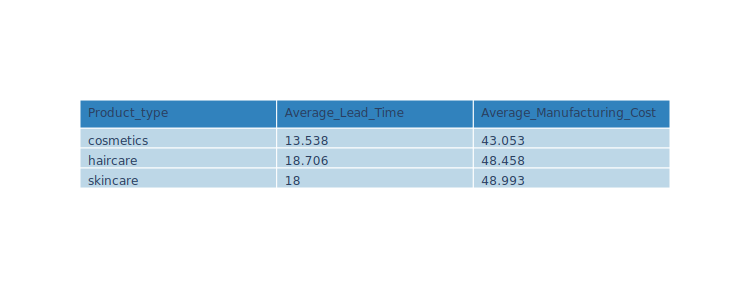

In [9]:
lead_time=df.groupby('Product type')['Lead time'].mean().round(3).reset_index()
manu_cost=df.groupby('Product type')['Manufacturing costs'].mean().round(3).reset_index()
result_data = lead_time.merge(manu_cost,on=['Product type'])
result_data.rename(columns={'Lead time': 'Average_Lead_Time', 'Manufacturing costs': 'Average_Manufacturing_Cost','Product type': 'Product_type'}, inplace=True)
fig = go.Figure(data=[go.Table(
    header=dict(values=list(result_data.columns),fill_color='rgb(49, 130, 189)', align='left'),
    cells=dict(values=[result_data.Product_type, result_data.Average_Lead_Time, result_data.Average_Manufacturing_Cost],fill_color='rgb(189, 215, 231)', align='left'))
])
fig.update_layout(width=750, height=300)
fig.show("svg")

------ANALYZISING SKU------

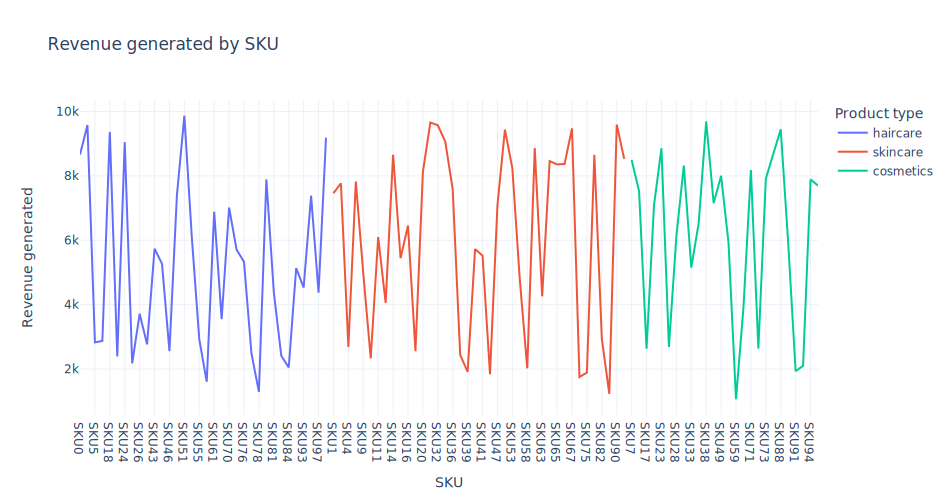

In [10]:
fig = px.line(df, x="SKU", y="Revenue generated", color='Product type',title="Revenue generated by SKU")
fig.update_layout(width=950, height=500)
fig.show("svg")

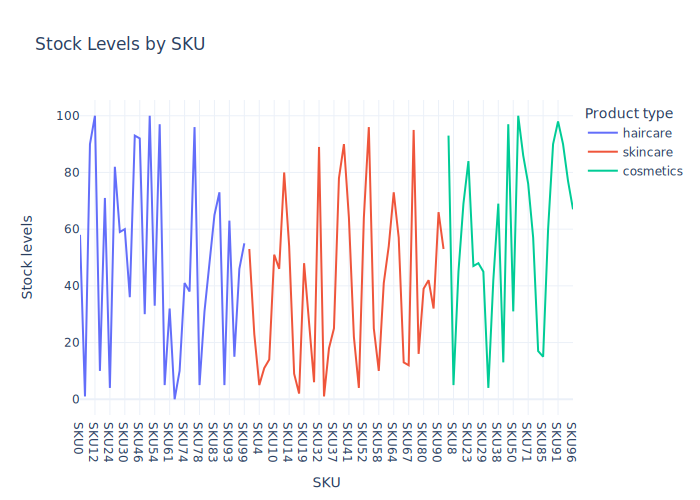

In [11]:
fig = px.line(df, x='SKU', y='Stock levels', color='Product type', title='Stock Levels by SKU')
fig.show("svg")

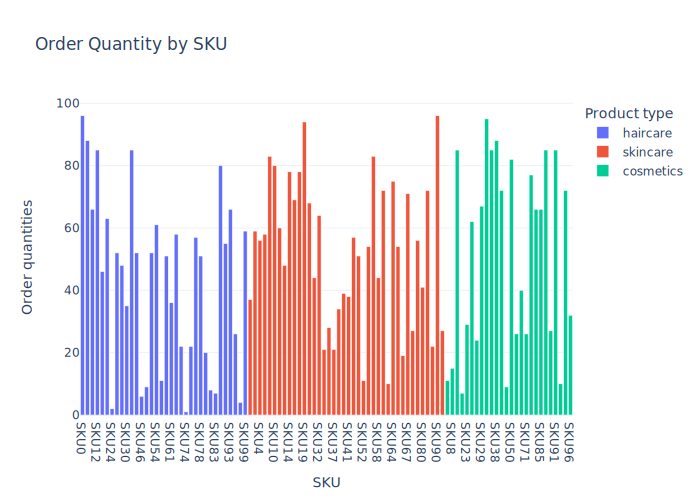

In [12]:
fig = px.bar(df, x='SKU',  y='Order quantities', title='Order Quantity by SKU', color='Product type')
fig.show("svg")

-----Cost Analysis------

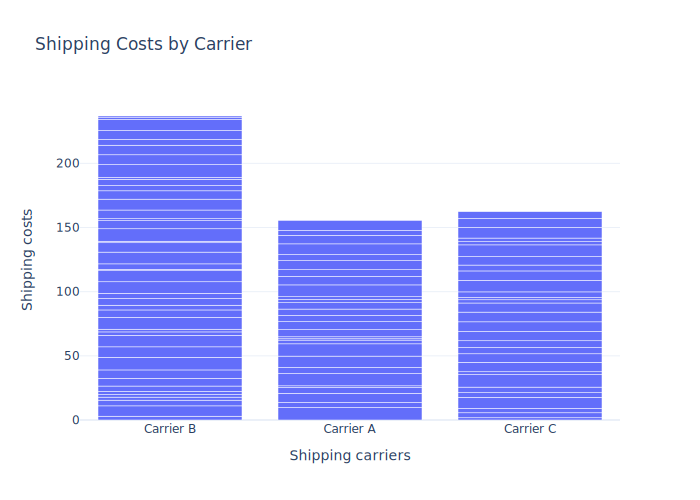

In [13]:
fig = px.bar(df, x='Shipping carriers',y='Shipping costs',title='Shipping Costs by Carrier')
fig.update_layout(width=700, height=500)
fig.show("svg")

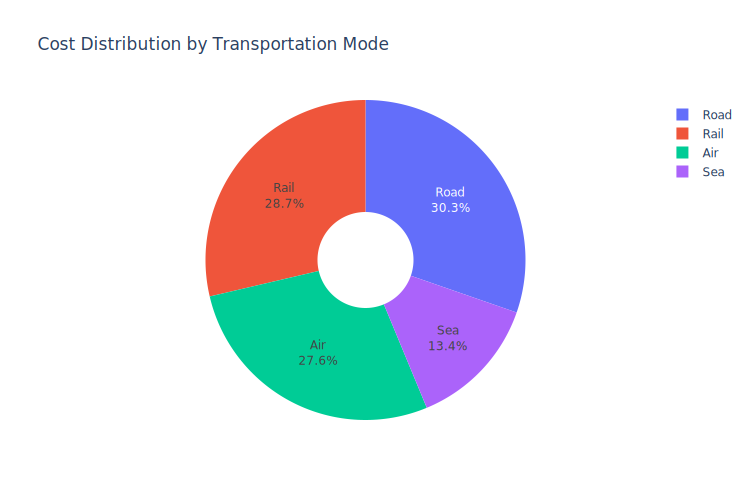

In [14]:
fig = px.pie(df,values='Costs', names='Transportation modes', title='Cost Distribution by Transportation Mode', hole=0.3)
fig.update_traces(textposition='inside', textinfo='label+percent')
fig.update_layout(width=750, height=500)
fig.show("svg")

-----Analyzing Defect Rate-----

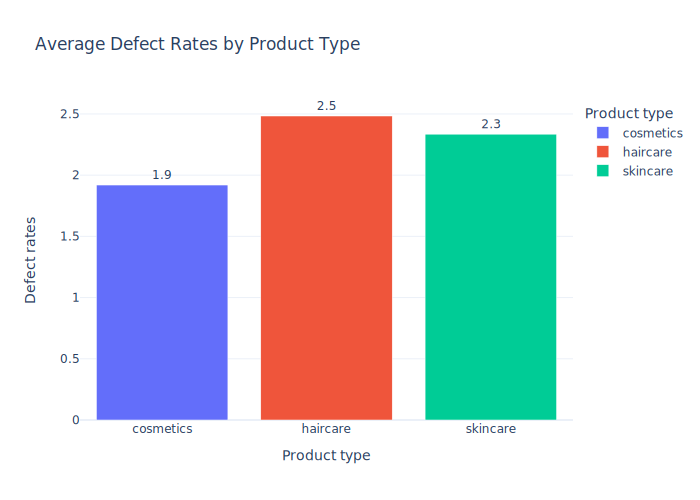

In [15]:
result = df.groupby('Product type')['Defect rates'].mean().reset_index()
fig = px.bar(result, x='Product type', y='Defect rates',title='Average Defect Rates by Product Type',color='Product type', text_auto='.2s')
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.update_layout(width=700, height=500)
fig.show("svg")

So the defect rate of haircare products is higher

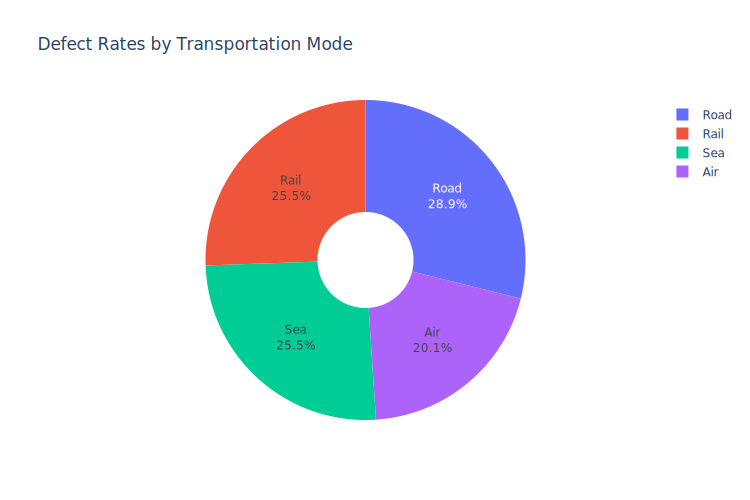

In [16]:
pivot_table = pd.pivot_table(df, values='Defect rates',index=['Transportation modes'],aggfunc='mean')
fig = px.pie(values=pivot_table["Defect rates"], names=pivot_table.index, title='Defect Rates by Transportation Mode',hole=0.3)
fig.update_traces(textposition='inside', textinfo='label+percent')
fig.update_layout(width=750, height=500)
fig.show("svg")

So the Road transportation results in a higher defect rate, and the Air transportation has the lowest defect rate.